<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Import" data-toc-modified-id="Data-Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Import</a></span><ul class="toc-item"><li><span><a href="#Imputing-missing-values" data-toc-modified-id="Imputing-missing-values-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imputing missing values</a></span></li></ul></li><li><span><a href="#Over-Sampling" data-toc-modified-id="Over-Sampling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Over Sampling</a></span></li><li><span><a href="#Under-&amp;-Over-Sampling" data-toc-modified-id="Under-&amp;-Over-Sampling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Under &amp; Over Sampling</a></span></li><li><span><a href="#Sampling-for-modelization" data-toc-modified-id="Sampling-for-modelization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sampling for modelization</a></span></li><li><span><a href="#Personalized-Metric" data-toc-modified-id="Personalized-Metric-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Personalized Metric</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-(Baseline)" data-toc-modified-id="Logistic-Regression-(Baseline)-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Logistic Regression (Baseline)</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Features-importance" data-toc-modified-id="Features-importance-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Features importance</a></span></li><li><span><a href="#Performances" data-toc-modified-id="Performances-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Performances</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Features-importance" data-toc-modified-id="Features-importance-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Features importance</a></span></li><li><span><a href="#Performances" data-toc-modified-id="Performances-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Performances</a></span></li></ul></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>XGBoost</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Features-importance" data-toc-modified-id="Features-importance-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Features importance</a></span></li><li><span><a href="#Performances" data-toc-modified-id="Performances-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Performances</a></span></li></ul></li></ul></li><li><span><a href="#Best-Model" data-toc-modified-id="Best-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Best Model</a></span></li><li><span><a href="#Model-Saving" data-toc-modified-id="Model-Saving-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Saving</a></span></li><li><span><a href="#Pipeline-Saving" data-toc-modified-id="Pipeline-Saving-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Pipeline Saving</a></span></li></ul></div>

https://medium.com/henry-jia/how-to-score-your-credit-1c08dd73e2ed <br/>
https://towardsdatascience.com/intro-to-credit-scorecard-9afeaaa3725f

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


# Data Import

In [2]:
try:
    application_train = pd.read_csv('cleaned_data/application_train_cleaned.csv').drop(columns=['Unnamed: 0'])
except:
    application_train = pd.read_csv('cleaned_data/application_train_cleaned.csv')

try:
    application_test = pd.read_csv('cleaned_data/application_test_cleaned.csv').drop(columns=['Unnamed: 0'])
except:
    application_test = pd.read_csv('cleaned_data/application_test_cleaned.csv')
    
application_train = application_train.set_index('SK_ID_CURR')
application_test = application_test.set_index('SK_ID_CURR')

In [3]:
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,MEAN_BUILDING_SCORE_AVG,TOTAL_BUILDING_SCORE_AVG,FLAG_DOCUMENT_TOTAL,AMT_REQ_CREDIT_BUREAU_TOTAL,BIRTH_EMPLOTED_INTERVEL,BIRTH_REGISTRATION_INTERVEL,INCOME_PER_FAMILY_MEMBER,SEASON_REMAINING,RATIO_INCOME_GOODS,CHILDREN_RATIO
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.144336,2.0207,1,1.0,8824,5813.0,202500.0,25924.5,-148500.0,0.0
100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.206343,2.8888,1,0.0,15577,15579.0,135000.0,31801.5,-859500.0,0.0
100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,NaN,0.0000,0,0.0,18821,14786.0,67500.0,10125.0,-67500.0,0.0
100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,NaN,0.0000,1,0.0,15966,9172.0,67500.0,4063.5,-162000.0,0.0
100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,NaN,0.0000,1,0.0,16894,15621.0,121500.0,8509.5,-391500.0,0.0


In [4]:
application_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,MEAN_BUILDING_SCORE_AVG,TOTAL_BUILDING_SCORE_AVG,FLAG_DOCUMENT_TOTAL,AMT_REQ_CREDIT_BUREAU_TOTAL,BIRTH_EMPLOTED_INTERVEL,BIRTH_REGISTRATION_INTERVEL,INCOME_PER_FAMILY_MEMBER,SEASON_REMAINING,RATIO_INCOME_GOODS,CHILDREN_RATIO
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,7,...,0.235467,1.4128,1.0,27.664697,16912,14071.0,67500.0,13189.5,-315000.0,0.000000
100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,7,...,NaN,0.0000,1.0,15.824870,13595,8946.0,49500.0,7380.0,-81000.0,0.000000
100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,3,...,NaN,0.0000,1.0,14.505482,15580,17863.0,101250.0,-19152.0,-427500.0,0.000000
100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,7,...,0.323150,4.5241,1.0,35.130726,12110,11976.0,78750.0,29731.5,-1260000.0,0.500000
100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,7,...,NaN,0.0000,1.0,19.506034,10849,9040.0,60000.0,12933.0,-445500.0,0.333333


In [5]:
def isnan(data, aff_glob=True, aff_col=False):
    taille = len(data)
    nulle = []
    nbr_moy = []
    for i in data.columns:
        if any(pd.isna(data[i])):
            nbr = len(data[i])-len(data[i].dropna())
            if aff_glob == True:
                print("La colonne '{}'".format(i), "comporte", nbr, "/ {}".format(taille), "valeur(s) manquante(s)")
                print("Ce qui représente {}%".format(nbr/taille*100))
            if aff_col == True:
                print("La colonne '{}' comporte des valeurs manquantes".format(i))
            col = data[i]
            nulle.append(col)
            nbr_moy.append(nbr)
            
    nbr_moy = pd.DataFrame(nbr_moy, columns=['Nbr']).mean()
    print(len(nulle), "colonnes au total possèdent des valeurs manquantes")
    print(nbr_moy[0], "/ {}".format(taille), "valeurs sont manquantes en moyenne dans chaque colonne") 

In [6]:
isnan(application_train)

La colonne 'AMT_ANNUITY' comporte 12 / 307511 valeur(s) manquante(s)
Ce qui représente 0.003902299429939092%
La colonne 'AMT_GOODS_PRICE' comporte 278 / 307511 valeur(s) manquante(s)
Ce qui représente 0.09040327012692229%
La colonne 'OWN_CAR_AGE' comporte 202929 / 307511 valeur(s) manquante(s)
Ce qui représente 65.9908100848425%
La colonne 'CNT_FAM_MEMBERS' comporte 2 / 307511 valeur(s) manquante(s)
Ce qui représente 0.0006503832383231819%
La colonne 'EXT_SOURCE_1' comporte 173378 / 307511 valeur(s) manquante(s)
Ce qui représente 56.381072546998325%
La colonne 'EXT_SOURCE_2' comporte 660 / 307511 valeur(s) manquante(s)
Ce qui représente 0.21462646864665005%
La colonne 'EXT_SOURCE_3' comporte 60965 / 307511 valeur(s) manquante(s)
Ce qui représente 19.825307062186393%
La colonne 'APARTMENTS_AVG' comporte 156061 / 307511 valeur(s) manquante(s)
Ce qui représente 50.74972927797705%
La colonne 'BASEMENTAREA_AVG' comporte 179943 / 307511 valeur(s) manquante(s)
Ce qui représente 58.51595552679

## Imputing missing values

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean2 = SimpleImputer(missing_values=np.nan, strategy='mean')

application_train_cleaned = imp_mean.fit_transform(application_train)
application_train_cleaned = pd.DataFrame(application_train_cleaned,
                                         columns=application_train.columns,
                                         index=application_train.index)

application_test_cleaned = imp_mean2.fit_transform(application_test)
application_test_cleaned = pd.DataFrame(application_test_cleaned,
                                        columns=application_test.columns,
                                        index=application_test.index)

In [9]:
isnan(application_train_cleaned)

0 colonnes au total possèdent des valeurs manquantes
nan / 307511 valeurs sont manquantes en moyenne dans chaque colonne


# Over Sampling

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = application_train_cleaned.drop(columns=['TARGET'])
y = application_train_cleaned.TARGET

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [14]:
counter = Counter(y)
print(counter)

Counter({0.0: 282686, 1.0: 24825})


In [15]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)

In [16]:
counter = Counter(y_res)
print(counter)

Counter({0.0: 226153, 1.0: 226153})


# Under & Over Sampling

In [17]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [18]:
counter = Counter(y)
print(counter)

Counter({0.0: 282686, 1.0: 24825})


In [19]:
over = SMOTE(sampling_strategy=0.2, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
x_res, y_res = pipeline.fit_resample(x_train, y_train)

In [20]:
counter = Counter(y_res)
print(counter)

Counter({0.0: 90460, 1.0: 45230})


# Sampling for modelization

In [21]:
sample = np.random.randint(0, x_res.shape[0], 10000)
x_sample = x_res.iloc[sample,:]
y_sample = y_res[sample]
x_sample.shape

(10000, 132)

In [22]:
counter = Counter(y_sample)
print(counter)

Counter({0.0: 6669, 1.0: 3331})


# Personalized Metric

In [23]:
def personalizedMetric(model_name, data, pred, saving=True, scores=None):
    """This function calculate a score based on a personalized metric ; 
    It creates a dataframe if it does not already exist, allowing you to keep the scores
    of your models in memory"""
    # Df init
    if scores is not None:
        df = scores        
    else:
        df = pd.DataFrame(columns=['Model', 'Score', 'false_positive', 'false_negative', 'good_pred'])
    
    # Calculation of the score for current model:
    false_positive = 0
    false_negative = 0
    good_pred = 0
    model_score = 0
    for i, j in zip(data, pred):
        if i == j:
            good_pred += 1
            model_score += 0
        elif i != j:
            if i == 0:
                false_positive += 1
                model_score += 1
            elif i == 1:
                false_negative += 1
                model_score += 5
    
    # Put the results in the df
    results = {"Model":model_name, "Score":model_score,
               "false_positive":false_positive, "false_negative":false_negative,
               "good_pred":good_pred}
    
    # if saving == True:
    df = df.append(results, ignore_index=True)
    
    return df

# Modeling

## Logistic Regression (Baseline)

In [24]:
from sklearn.linear_model import LogisticRegression

### Training

In [25]:
clf = LogisticRegression(max_iter=1000, random_state=42).fit(x_sample, y_sample)
clf_predict = clf.predict(x_test)
#clf_predict = pd.DataFrame(clf_predict, index=y_test.index, columns=['predict'])

### Features importance

### Performances

In [26]:
scores = personalizedMetric('Baseline', y_test, clf_predict)
scores

,Model,Score,false_positive,false_negative,good_pred
0,Baseline,24851,786,4813,55904


## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

### Training

In [28]:
# Nombre d'arbres dans la forêt
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Level max des arbres
max_depth = [int(x) for x in np.linspace(40, 140, num = 10)]
max_depth.append(None)
# nombre de sample min pour split
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# On crée la random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

t0 = time.perf_counter()

rfc = RandomForestClassifier()

# On recherche avec 100 combinaisons différentes 
rfc = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=100, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

# On fit
rfc.fit(x_sample, y_sample)

t1 = time.perf_counter()
print("\n")
print ('Function elapsed in: ', t1-t0, 's')

rfc.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.3min finished




Function elapsed in:  843.379606 s


{'n_estimators': 1155,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 73,
 'bootstrap': False}

In [29]:
t0 = time.perf_counter()

rf = RandomForestClassifier(n_estimators = list(rfc.best_params_.values())[0],
                             min_samples_split = list(rfc.best_params_.values())[1],
                             min_samples_leaf=list(rfc.best_params_.values())[2],
                             max_depth = list(rfc.best_params_.values())[3],
                             bootstrap=list(rfc.best_params_.values())[4],
                             n_jobs = -1)
rf.fit(x_sample, y_sample)
# on prédit
y_predict = rf.predict(x_test)

t1 = time.perf_counter()
print("\n")
print ('Function elapsed in: ', t1-t0, 's')

y_predict_df = pd.DataFrame(y_predict, index=y_test.index, columns=['Predict'])



Function elapsed in:  7.623179599999958 s


### Features importance

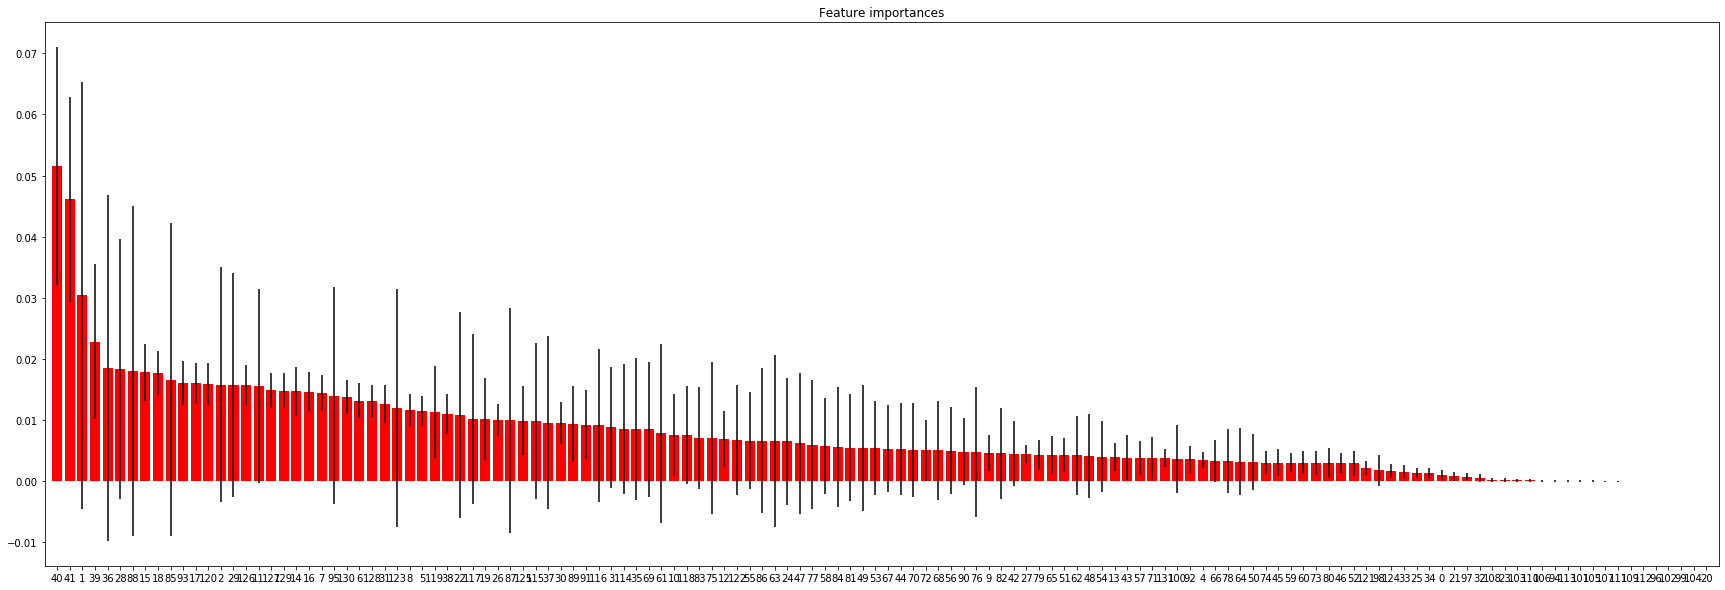

In [30]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(30,10))
plt.title("Feature importances")
plt.bar(range(x_sample.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x_sample.shape[1]), indices)
plt.xlim([-1, x_sample.shape[1]])
plt.show()

### Performances

In [31]:
scores = personalizedMetric('Random Forest', y_test, y_predict, scores=scores)
scores

,Model,Score,false_positive,false_negative,good_pred
0,Baseline,24851,786,4813,55904
1,Random Forest,24210,360,4770,56373


In [32]:
clf_predict

array([0., 0., 0., ..., 0., 0., 0.])

## XGBoost

In [33]:
import xgboost as xgb

In [34]:
dtrain = xgb.DMatrix(x_sample, label=y_sample)
dtest = xgb.DMatrix(x_test, label=y_test)

In [35]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

### Training

In [36]:
num_round = 10
bst = xgb.train(param, dtrain, num_round)

### Features importance

[]

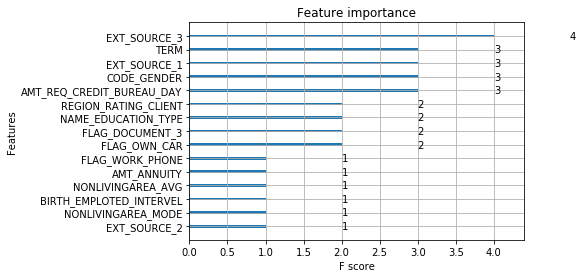

In [37]:
xgb.plot_importance(bst)
plt.plot()

In [38]:
# Load model saved, usefull for after
#bst = xgb.Booster({'nthread': 4})  # init model
#bst.load_model('model.bin')  # load data

### Performances

In [45]:
ypred = bst.predict(dtest)
ypred_df = pd.DataFrame(ypred, index=y_test.index, columns=['Predict'])
ypred_df['Predict'] = np.where(ypred_df['Predict']>0.50, 1, 0)
ypred_ = ypred_df['Predict']

In [46]:
scores = personalizedMetric('XGBoost', y_test, ypred_, scores=scores)
scores

,Model,Score,false_positive,false_negative,good_pred
0,Baseline,24851,786,4813,55904
1,Random Forest,24210,360,4770,56373
2,XGBoost,81383,56533,4970,0
3,XGBoost,23680,2925,4151,54427
4,XGBoost,23680,2925,4151,54427


The model is less effective if we watch only the accuracy score, but it understands better the problem and this time predict not only 0 values, but also 1 values

In [55]:
len(ypred[(ypred >= 0.4) & (ypred <= 0.6)])

5725

# Best Model

# Model Saving

# Pipeline Saving